In [18]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("..")

from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple)
from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)

In [44]:
params = parse_experiment_params("../experiments_params/experiment_gamma.json")
results = get_experiment_mean_data(params, "../results/experiment_gamma/")

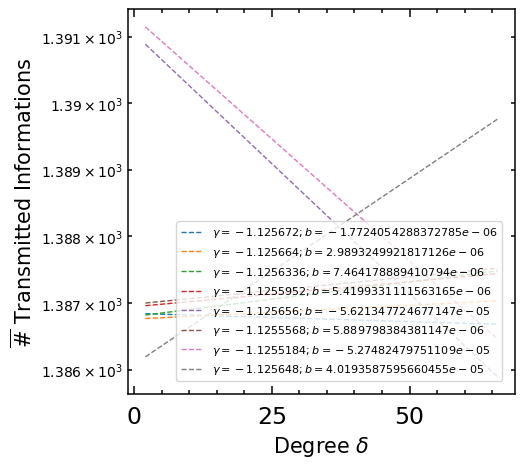

In [42]:
nrows = 1
ncols = 1
titles = [""]
# titles[1] = titles[1] + ", Log scale."

title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"$\overline{\#}$ Transmitted Informations"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Degree $\delta$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

measure = 'transmissions'
marksize = 50

gammas = [-1.125672, -1.125664, -1.1256336, -1.1255952, -1.125656, -1.1255568, -1.1255184, -1.125648]

for g in gammas:
    selected_params = [x for x in params if x['gamma'] == g]
    degrees = []
    counts = []
    for p in selected_params:
        degrees.append(list(results[make_tuple(p)][measure].keys()))
        counts.append(list(results[make_tuple(p)][measure].values()))

    degrees = degrees[0]
    counts  = np.array(counts).mean(axis = 0)

    axs[0].set_yscale('log')
    # axs[0].scatter(degrees, counts, edgecolors = 'k', s = marksize, label = rf'$\gamma = {g}$')

    p = np.polyfit(degrees, np.log(counts), 1, w = counts)
    a = np.exp(p[1])
    b = p[0]
    x_fitted = np.linspace(np.min(degrees), np.max(degrees), 50)
    y_fitted = a* np.exp(b * x_fitted)
    axs[0].plot(x_fitted, y_fitted, '--', linewidth = 1, label = rf'$\gamma = {g}; b = {b}$')

axs[0].legend(fontsize = 8, loc = 'lower right', bbox_to_anchor = (0.98, 0.02))

In [40]:
np.linspace(-1.125672, -1.12548, 6)

array([-1.125672 , -1.1256336, -1.1255952, -1.1255568, -1.1255184,
       -1.12548  ])

In [45]:
gammas = [
    -3.0, -2.8, -2.6, -2.4, -2.2, -2, -1.8, -1.6, -1.4, -1.35, -1.3, -1.25, -1.2, -1.15, -1.145,
    -1.14, -1.135, -1.13, -1.129, -1.128, -1.127, -1.126, -1.1258, -1.12576, -1.12572, -1.12568,
    -1.125672, -1.125664, -1.1256336, -1.1255952, -1.125656, -1.1255568, -1.1255184, -1.125648,
    -1.12564, -1.1256, -1.1254, -1.1252, -1.125, -1.12, -1.115, -1.11, -1.05, -1
]

coefficients = []

for g in gammas:
    selected_params = [x for x in params if x['gamma'] == g]
    degrees = []
    counts = []
    for p in selected_params:
        degrees.append(list(results[make_tuple(p)][measure].keys()))
        counts.append(list(results[make_tuple(p)][measure].values()))

    degrees = degrees[0]
    counts  = np.array(counts).mean(axis = 0)

    axs[0].set_yscale('log')
    # axs[0].scatter(degrees, counts, edgecolors = 'k', s = marksize, label = rf'$\gamma = {g}$')

    p = np.polyfit(degrees, np.log(counts), 1, w = counts)
    a = np.exp(p[1])
    b = p[0]

    coefficients.append(b)

In [71]:
min_coefficient_arg = np.argmin([np.abs(x) for x in coefficients])
min_coefficient_val = np.min([np.abs(x) for x in coefficients])
min_coefficient_gamma = gammas[min_coefficient_arg]

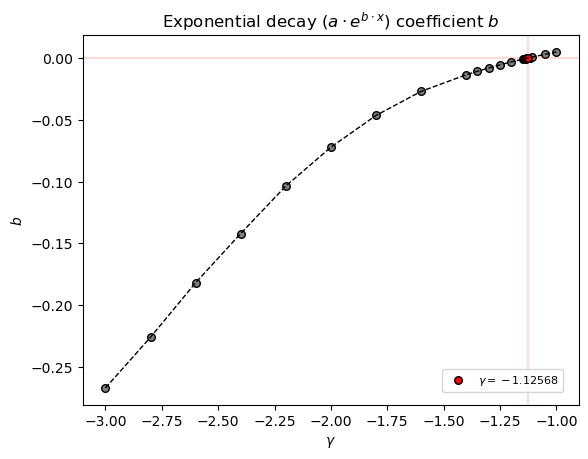

In [75]:
fig, ax = plt.subplots()
ax.scatter(gammas, coefficients, s = 30, edgecolors = 'k', color = 'grey')
ax.plot(gammas, coefficients, '--k', linewidth = 1)

ax.axvline(min_coefficient_gamma, color = 'r', linewidth = 0.2)
ax.axhline(min_coefficient_val, color = 'r', linewidth = 0.2)
ax.scatter(
    [min_coefficient_gamma],
    [min_coefficient_val],
    s = 30,
    edgecolors = 'k',
    color = 'r',
    label = rf"$\gamma = {min_coefficient_gamma}$"
)

ax.set_xlabel(r'$\gamma$')
ax.set_ylabel(r'$b$')
ax.set_title(r'Exponential decay ($a\cdot e^{b\cdot x}$) coefficient $b$')
ax.legend(fontsize = 8, loc = 'lower right', bbox_to_anchor = (0.98, 0.02))